In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/')

['pituitary', 'notumor', 'meningioma', 'glioma']

In [2]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [3]:
#displaying the count of images we have for each label in the dataset (training & testing)
print(len(os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/')))
print(len(os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/notumor/')))
print(len(os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/')))
print(len(os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/glioma/')))

1457
1595
1339
1321


In [4]:
print(len(os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/')))
print(len(os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/')))
print(len(os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/')))
print(len(os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/')))

300
405
306
300


In [6]:
#importing libraries
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import load_img, ImageDataGenerator as IDG
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input


In [7]:

import tensorflow 
from keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator as IDG, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import seaborn
import torch
from IPython import display 
%config InlineBackend.figure_formats = ['svg']

import cv2

In [8]:
#resizing the training set images 
image = []
label = []
img_width = 64
img_height = 64

for i in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/'):
    for j in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/'+i):
        img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/'+i+'/'+j)
        img = cv2.resize(img, (img_height,img_width))
        label.append(i)
        image.append(img)
        
        
        
x = np.array(image)
y = np.array(label)


In [9]:
#to normalize the labels
le = LabelEncoder()

y = le.fit_transform(y)

In [10]:
#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=30,stratify=y)
x_train = x_train/255
x_test = x_test/255


In [11]:
#data preprocessing and data augmentation
train_datagen = IDG(
                   fill_mode='nearest',
                   featurewise_center=True,
                   validation_split=0.2,
                   horizontal_flip=True,
                   vertical_flip= True, 
                   shear_range=0.2,
                   zoom_range=0.2,
                   brightness_range=(0.4,0.6),
                   rotation_range=10,
                   featurewise_std_normalization=True,
                   )
train_datagen.fit(x_train)

In [12]:
#building a model for our dataset with few convolution layers, maxpooling, activation functions and dense layers
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects



model= keras.Sequential()

model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(64,64,3),name='block1_cov1'))
model.add(Conv2D(32, (3, 3), activation='relu',name='block1_cov2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block1_pool'))

model.add(Conv2D(64, (3, 3), activation='relu',name='block2_cov1'))
model.add(Conv2D(64, (3, 3), activation='relu',name='block2_cov2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block2_pool'))

model.add(Conv2D(128, (3, 3), activation='relu',name='block3_cov1'))
model.add(Conv2D(128, (3, 3), activation='relu',name='block3_cov2'))
model.add(Conv2D(128, (3, 3), activation='relu',name='block3_cov3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block3_pool'))

model.add(GlobalAveragePooling2D(name='global_average_pooling2d'))
model.add(Dense(128, activation = 'relu',name='dense1'))
model.add(Dense(4, activation='softmax',name='dense2'))

model.summary()


2022-12-10 23:25:20.787896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_cov1 (Conv2D)         (None, 62, 62, 32)        896       
_________________________________________________________________
block1_cov2 (Conv2D)         (None, 60, 60, 32)        9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 32)        0         
_________________________________________________________________
block2_cov1 (Conv2D)         (None, 28, 28, 64)        18496     
_________________________________________________________________
block2_cov2 (Conv2D)         (None, 26, 26, 64)        36928     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 13, 13, 64)        0         
_________________________________________________________________
block3_cov1 (Conv2D)         (None, 11, 11, 128)       7

2022-12-10 23:25:20.788803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 23:25:20.789759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 23:25:20.790543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 23:25:20.791285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 23:25:20.792022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [13]:
#compiling the model with adam optimizer
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [14]:
#early fitting the model in order to avoid overfitting 
early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30,restore_best_weights=True)
FIT =model.fit(x_train,y_train,
    validation_data = (x_test,y_test), 
    epochs=100,
    callbacks = [early],
    verbose = 1,
    shuffle=True,           
    steps_per_epoch=6)

2022-12-10 23:26:09.159416: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-10 23:26:10.393904: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


6/6 [==============================] - 12s 1s/step - loss: 1.3721 - accuracy: 0.2775 - val_loss: 1.3539 - val_accuracy: 0.2791
Epoch 2/100
6/6 [==============================] - 1s 204ms/step - loss: 1.3620 - accuracy: 0.2793 - val_loss: 1.3525 - val_accuracy: 0.2800
Epoch 3/100
6/6 [==============================] - 1s 205ms/step - loss: 1.3333 - accuracy: 0.2799 - val_loss: 1.3058 - val_accuracy: 0.3491
Epoch 4/100
6/6 [==============================] - 1s 211ms/step - loss: 1.2590 - accuracy: 0.3690 - val_loss: 1.2237 - val_accuracy: 0.3333
Epoch 5/100
6/6 [==============================] - 1s 207ms/step - loss: 1.1227 - accuracy: 0.4839 - val_loss: 1.0348 - val_accuracy: 0.5739
Epoch 6/100
6/6 [==============================] - 1s 206ms/step - loss: 1.1166 - accuracy: 0.4946 - val_loss: 1.0252 - val_accuracy: 0.5984
Epoch 7/100
6/6 [==============================] - 1s 206ms/step - loss: 1.0430 - accuracy: 0.5758 - val_loss: 0.9785 - val_accuracy: 0.6185
Epoch 8/100
6/6 [==========

In [15]:
#to get the test accuracy
model.evaluate(x_test,y_test)

36/36 [==============================] - 0s 6ms/step - loss: 0.3093 - accuracy: 0.9134


[0.3093341588973999, 0.913385808467865]

In [16]:
#details to get the plot
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

<Figure size 1152x288 with 0 Axes>

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

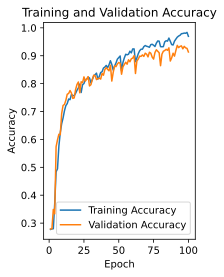

In [17]:
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

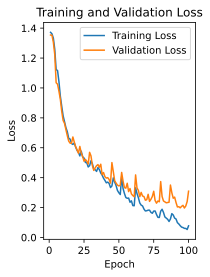

In [20]:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [22]:
#predictions
y_pred = model.predict(x_test)
y_pred = np.argmax (y_pred, axis = 1)

In [23]:
#printing the report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       288
           1       0.90      0.82      0.86       291
           2       0.96      0.97      0.96       315
           3       0.84      0.98      0.91       249

    accuracy                           0.91      1143
   macro avg       0.91      0.91      0.91      1143
weighted avg       0.92      0.91      0.91      1143



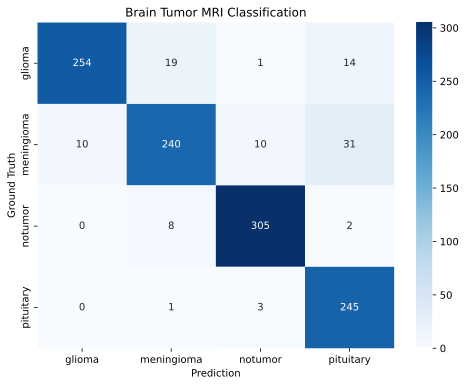

In [24]:
#code to get the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

cnf = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Brain Tumor MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

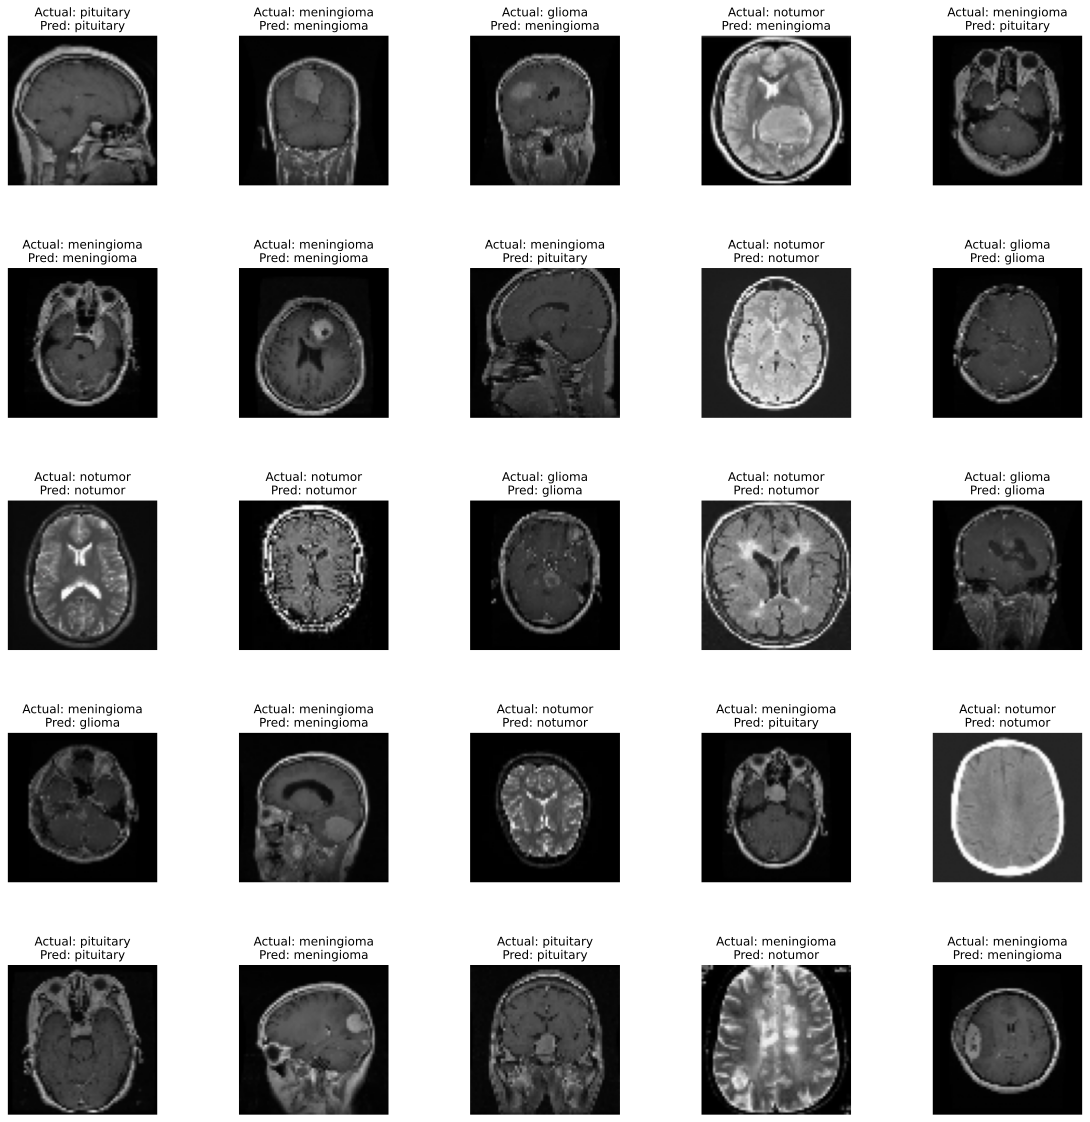

In [25]:
#code to visualize model predictions
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = y_pred[img_idx]
        predicted = y_test[img_idx]
       
        ax[i][j].axis('off')
        ax[i][j].set_title('
                           
                           Actual: '+labels[actual]+'\nPred: '+labels[predicted] )
        ax[i][j].imshow(x_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)  